In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import matplotlib as mpl

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from scipy.stats import multivariate_normal    
from sklearn.decomposition import KernelPCA, PCA
import pandas as pd
import seaborn as sns
from skimage import io
import scipy
import sklearn
import tensorflow as tf

2022-12-07 11:20:16.045463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Some code from lab sheets

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#data = fashion_mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()


In [3]:
#making backup
X_train_orig, X_test_orig = X_train, X_test

In [5]:
#dividing x train and test by 255 to normalise it
#X_train = np.divide(X_train, 255)
#X_test = np.divide(X_test, 255)

# Calculate means
#X_mean = X_train.mean(axis=0)

# Substract means
#X_train_nm = X_train - X_mean
#X_test_nm = X_test - X_mean
#print(X_train.shape)
#X_train_reshaped = X_train_nm.reshape(X_train_nm.shape[0], -1)
print(X_train_reshaped.shape)

(60000, 28, 28)
(60000, 784)


In [4]:
X_train= X_train[:10000]
Y_train= Y_train[:10000]

print(X_train.shape)
print(Y_train.shape)


(10000, 28, 28)
(10000,)


In [5]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
print(X_train_reshaped.shape)

(10000, 784)


In [6]:
def plot_k_means(X, cluster_assignments, centroid_locations):
    plt.figure(figsize=(6, 6))
    plt.viridis() # Set colour map
    plt.scatter(X[:, 0], X[:, 1], s=20, c=cluster_assignments, alpha=0.8) # plot data points
    plt.scatter(centroid_locations[:, 0], centroid_locations[:, 1], s=200, marker='X', c=range(K), edgecolors='k') # plot centroids
    plt.show()

In [7]:
def plot_GMM_density(X, gmm):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1], s=20, c='b', alpha=0.8)
    x = np.linspace(-5., 8., 1000)
    y = np.linspace(-2., 10., 1000)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX).reshape(X.shape)
    plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, np.max(np.log(Z)), 20))
    plt.show()

In [8]:
def plot_GMM_mixture_components(X, gmm):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1], s=20, c='b', alpha=0.8)
    x = np.linspace(-5., 8., 1000)
    y = np.linspace(-2., 10., 1000)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    
    colours = ['red', 'green', 'purple']
    
    for i in range(K):
        mean, covariance = gmm.means_[i], gmm.covariances_[i]
        gaussian = multivariate_normal(mean, covariance)
        Z = -gaussian.logpdf(XX).reshape(X.shape)
        plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 1, 4), colors=cols)
    plt.show()

In [9]:
X_std = StandardScaler().fit_transform(X_train_reshaped)

pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_std)

In [10]:
gmm = GaussianMixture(n_components=10)
gmm.fit(X_pca)

GaussianMixture(n_components=10)

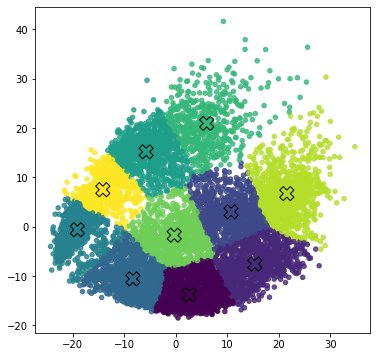

In [11]:

    
X_std = StandardScaler().fit_transform(X_train_reshaped)

pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_std)

K = 10
kmeans = KMeans(K, init='random').fit(X_pca)
cluster_assignments = kmeans.predict(X_pca)
centroid_locations = kmeans.cluster_centers_

plot_k_means(X_pca, cluster_assignments, centroid_locations)

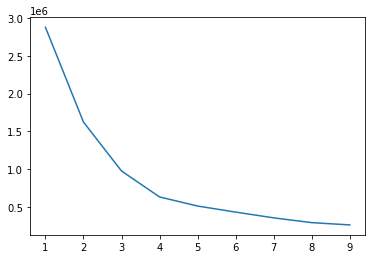

In [12]:
K_values = range(1, 10)
scores = []

for K in K_values:
    kmeans = KMeans(K).fit(X_pca)
    scores.append(-kmeans.score(X_pca))
    
plt.figure()
plt.plot(K_values, scores)
plt.show()


In [13]:
K = 10
gmm = GaussianMixture(random_state=1, n_components=K, max_iter=10, warm_start=True, init_params= 'kmeans', tol=1e-8)

iteration = 0
while True:
    iteration += 1
    print(f'\nIteration {iteration}:')
    gmm.fit(X_pca)
    
    centroid_location = gmm.means_
    cluster_assignments = gmm.predict_proba(X_pca)
    
    if gmm.converged_:
        print("Converged!")
        break


Iteration 1:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 2:

Iteration 3:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 4:

Iteration 5:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 6:

Iteration 7:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 8:

Iteration 9:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 10:

Iteration 11:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 12:

Iteration 13:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 14:

Iteration 15:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 16:

Iteration 17:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 18:

Iteration 19:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 20:

Iteration 21:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 22:

Iteration 23:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 24:

Iteration 25:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 26:

Iteration 27:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 28:

Iteration 29:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 30:

Iteration 31:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 32:

Iteration 33:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 34:

Iteration 35:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 36:

Iteration 37:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 38:

Iteration 39:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 40:

Iteration 41:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 42:

Iteration 43:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 44:

Iteration 45:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 46:

Iteration 47:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 48:

Iteration 49:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 50:

Iteration 51:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 52:

Iteration 53:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 54:

Iteration 55:


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



Iteration 56:

Iteration 57:

Iteration 58:
Converged!


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [14]:
def plot_gmm_soft(X, cluster_assignments, centroid_locations):
    plt.figure(figsize=(15, 10))
    plt.viridis()#colour
    plt.scatter(X[:, 0], X[:, 1], s=20, c=cols, alpha=0.8) # plot data points
    plt.scatter(centroid_locations[:, 0], centroid_locations[:, 1], s=200, marker='X', c=range(K), edgecolors='k') # plot centroids
    plt.show()

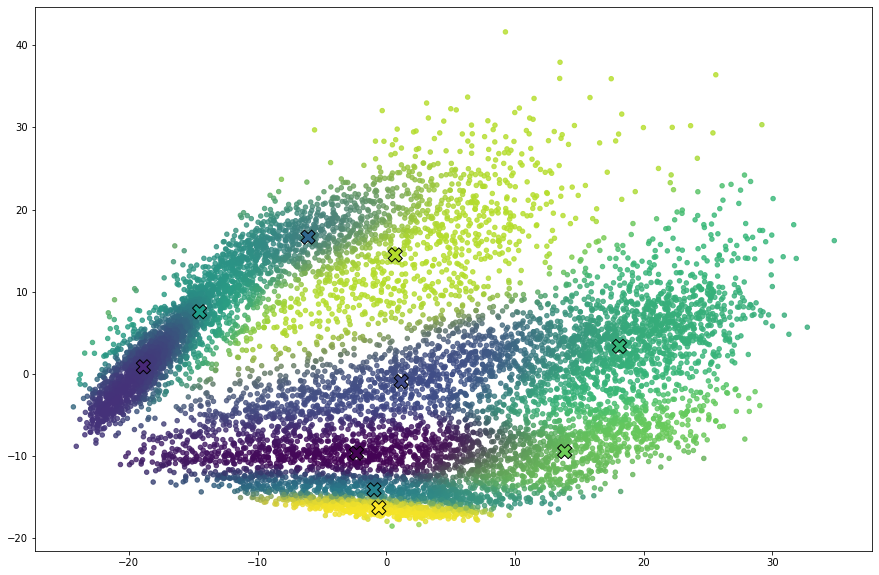

In [15]:
cols = []
colour = mpl.cm.viridis(np.linspace(0,1,K))

labels = gmm.predict(X_pca)
prob = gmm.predict_proba(X_pca)

cluster_assignments = prob
centroid_locations = gmm.means_


for i in gmm.predict_proba(X_pca):
    
    for k in range(len(colour)):
        
        if k == 0:
            clus_col = colour[k] * i[k]
            
        else:
            clus_col = clus_col + colour[k] * i[k]
            
    for f in range (len(clus_col)):
        if clus_col[f] > 1:
            clus_col[f] = 1
            
    cols.append(clus_col)
cols = np.array(cols)
plot_gmm_soft(X_pca, cluster_assignments, centroid_locations)
